In [163]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [165]:
import numpy as np
import pandas as pd

df = pd.read_csv('C:/Users/akasa/Downloads/abalone.csv',index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


Text(0.5, 1.0, 'Rings')

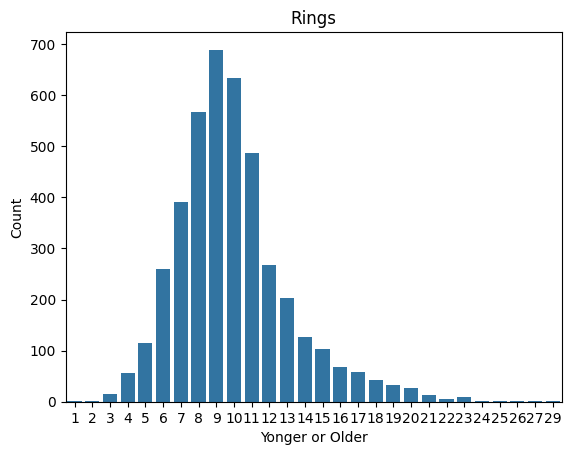

In [167]:
sns.countplot(data = df, x="Rings")
plt.xlabel("Yonger or Older")
plt.ylabel("Count")
plt.title("Rings")

In [168]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [169]:
import pandas as pd
import matplotlib.pyplot as plt

# Rings 값이 3부터 23 사이인 데이터만 필터링
data = df[(df['Rings'] >= 3) & (df['Rings'] <= 23)]

# Rings의 고유한 값들을 0부터 시작하는 인덱스로 재매핑
unique_rings = sorted(data['Rings'].unique())  # 고유한 값들을 정렬
encoding_map = {ring: idx for idx, ring in enumerate(unique_rings)}  # 재매핑

# 인코딩 적용
df['Rings'] =data['Rings'].map(encoding_map)

# 결과 출력
print(df)

     Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
id                                                                 
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
id                                         
0             0.1010       

Text(0.5, 1.0, 'Rings')

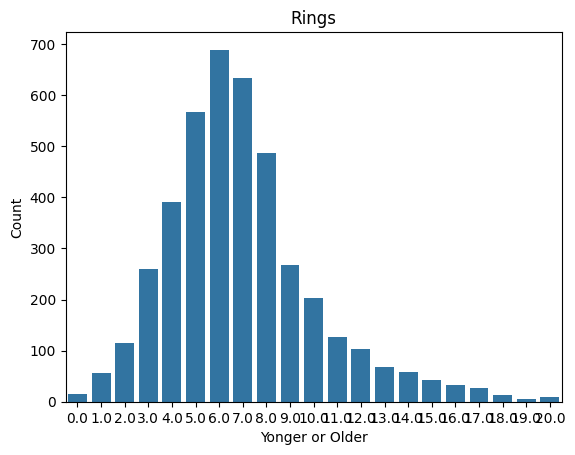

In [173]:
sns.countplot(data = df, x="Rings")
plt.xlabel("Yonger or Older")
plt.ylabel("Count")
plt.title("Rings")

결측치 확인 및 제거

In [175]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             9
dtype: int64

In [177]:
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [180]:
import tensorflow as tf

#sex label encoding 1(label encoding)
target_label = df['Sex']
target_label.dtype
mapping = {'M':0, 'F':1,'I':2}
df['Sex'] = target_label.map(mapping)

#target 데이터 옮기기
rings = df['Rings']
df_no_ring = df.drop('Rings',axis=1)
df_no_ring.dropna()

#maxminscale을 위한 데이터 분리
one_hot = df['Sex']
df_other = df_no_ring.drop('Sex',axis=1)
df_other.head()

#Sex label encoding 2(one-hot encoding)
#one_hot = pd.get_dummies(df['Sex'],prefix='Sex')
#df = df.drop('Sex',axis=1)
#df

C:\Users\akasa\AppData\Local\Temp\ipykernel_21556\2969370299.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = target_label.map(mapping)


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


각각 scailing을 진행한 후 하나의 데이터로 합쳐준다

In [183]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_other)
df_scaled = pd.DataFrame(df_scaled,columns=df_other.columns)
df_scaled = pd.concat([df_scaled,one_hot],axis=1)
df_scaled

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex
0,0.489362,0.491071,0.084071,0.179592,0.149445,0.132324,0.146707,0.0
1,0.340426,0.312500,0.079646,0.077196,0.065298,0.063199,0.066866,0.0
2,0.595745,0.589286,0.119469,0.237445,0.170986,0.185648,0.206587,1.0
3,0.468085,0.491071,0.110619,0.180302,0.143386,0.149440,0.151697,0.0
4,0.312057,0.294643,0.070796,0.069920,0.058566,0.051350,0.051896,2.0
...,...,...,...,...,...,...,...,...
4172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


Classification이므로 target인 Rings를 yonger/older의 2 그룹으로 나누고 스케일링을 진행한 데이터에 합쳐준다

C:\Users\akasa\AppData\Local\Temp\ipykernel_21556\2383675932.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rings'] = df['Rings'].apply(lambda x: 0 if x <= 6.0 else 1)


Text(0.5, 1.0, 'Rings')

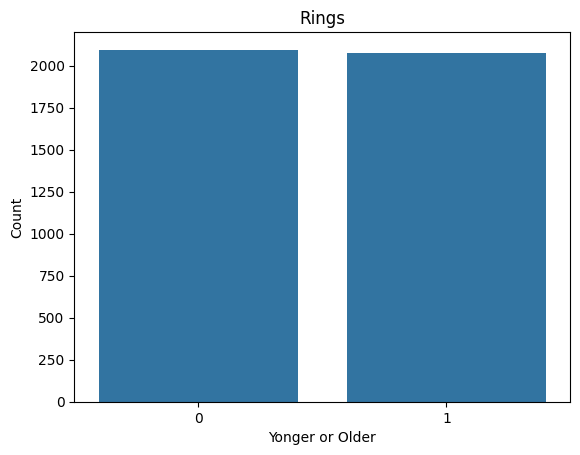

In [186]:
#청년층의 비율을 0.3정도로 잡고 yonger/older 클래스를 나눈다

df['Rings'] = df['Rings'].apply(lambda x: 0 if x <= 6.0 else 1)
df['Rings']

sns.countplot(data = df, x="Rings")
plt.xlabel("Yonger or Older")
plt.ylabel("Count")
plt.title("Rings")

In [187]:
df_scaled = pd.concat([df_scaled,df['Rings']],axis=1)
df_scaled

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex,Rings
0,0.489362,0.491071,0.084071,0.179592,0.149445,0.132324,0.146707,0.0,1.0
1,0.340426,0.312500,0.079646,0.077196,0.065298,0.063199,0.066866,0.0,0.0
2,0.595745,0.589286,0.119469,0.237445,0.170986,0.185648,0.206587,1.0,0.0
3,0.468085,0.491071,0.110619,0.180302,0.143386,0.149440,0.151697,0.0,1.0
4,0.312057,0.294643,0.070796,0.069920,0.058566,0.051350,0.051896,2.0,0.0
...,...,...,...,...,...,...,...,...,...
4172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
4173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
4174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0


In [190]:
# NaN 값 확인
print("데이터에 NaN이 있는지 확인:")
print(df_scaled.isna().sum())

# Inf 값 확인
print("데이터에 무한대 값이 있는지 확인:")
print(np.isinf(df_scaled).sum())

데이터에 NaN이 있는지 확인:
Length            9
Diameter          9
Height            9
Whole_weight      9
Shucked_weight    9
Viscera_weight    9
Shell_weight      9
Sex               9
Rings             9
dtype: int64
데이터에 무한대 값이 있는지 확인:
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Sex               0
Rings             0
dtype: int64


In [192]:
df_scaled = df_scaled.dropna()
df_scaled.isnull().sum()

Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Sex               0
Rings             0
dtype: int64

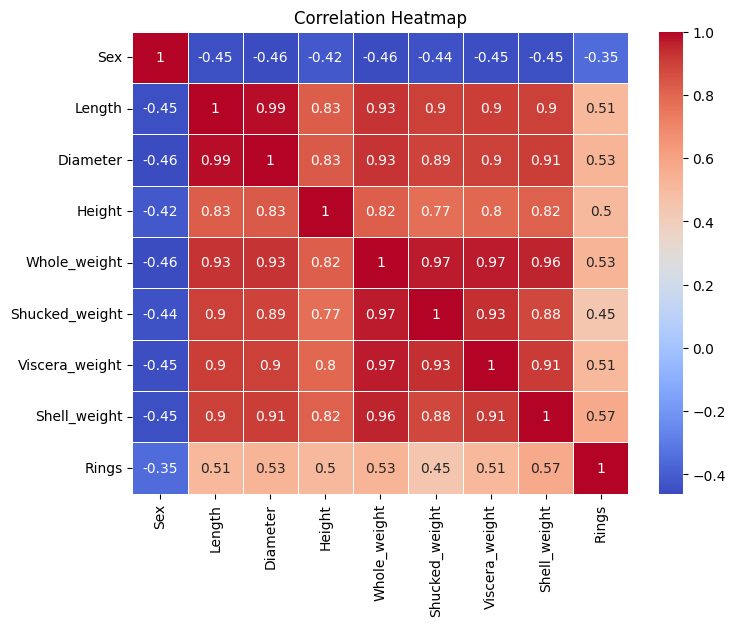

In [194]:
# 상관계수 계산
correlation_matrix = df.corr()

# Heatmap 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [195]:
X = df_scaled.drop('Rings',axis=1).values
y = df_scaled['Rings'].values
print(X)
print(y)

[[0.4893617  0.49107143 0.0840708  ... 0.1323239  0.14670659 0.        ]
 [0.34042553 0.3125     0.07964602 ... 0.06319947 0.06686627 0.        ]
 [0.59574468 0.58928571 0.11946903 ... 0.18564845 0.20658683 1.        ]
 ...
 [0.69503546 0.6875     0.18141593 ... 0.37788018 0.30439122 2.        ]
 [0.73049645 0.70535714 0.13274336 ... 0.34298881 0.29241517 2.        ]
 [0.85106383 0.83035714 0.17256637 ... 0.49506254 0.49101796 0.        ]]
[1. 0. 0. ... 0. 1. 0.]


In [196]:
#CNN에 맞게 input data 형식 변환
X = X.reshape(X.shape[0],X.shape[1],1)
X.shape

(4159, 8, 1)

In [200]:
#데이터 분할
X_train, X_test_val, Y_train, Y_test_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_test_val, Y_test_val, test_size=0.5, random_state=42)
print(X_train.shape,X_test.shape,X_val.shape)
print(Y_train.shape,Y_test.shape,Y_val.shape)

(3327, 8, 1) (416, 8, 1) (416, 8, 1)
(3327,) (416,) (416,)


Epoch 1/100
104/104 [==============================] - 1s 6ms/step - loss: 0.6949 - accuracy: 0.5278 - val_loss: 0.6817 - val_accuracy: 0.6154
Epoch 2/100
104/104 [==============================] - 0s 3ms/step - loss: 0.6823 - accuracy: 0.5792 - val_loss: 0.6661 - val_accuracy: 0.6466
Epoch 3/100
104/104 [==============================] - 0s 3ms/step - loss: 0.6704 - accuracy: 0.6029 - val_loss: 0.6516 - val_accuracy: 0.6779
Epoch 4/100
104/104 [==============================] - 0s 3ms/step - loss: 0.6565 - accuracy: 0.6258 - val_loss: 0.6370 - val_accuracy: 0.6755
Epoch 5/100
104/104 [==============================] - 0s 3ms/step - loss: 0.6492 - accuracy: 0.6240 - val_loss: 0.6244 - val_accuracy: 0.6827
Epoch 6/100
104/104 [==============================] - 0s 3ms/step - loss: 0.6450 - accuracy: 0.6396 - val_loss: 0.6170 - val_accuracy: 0.6851
Epoch 7/100
104/104 [==============================] - 0s 4ms/step - loss: 0.6416 - accuracy: 0.6321 - val_loss: 0.6123 - val_accuracy: 0.6851

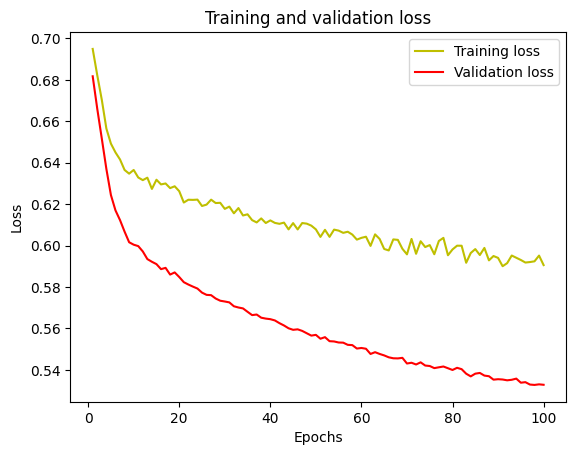

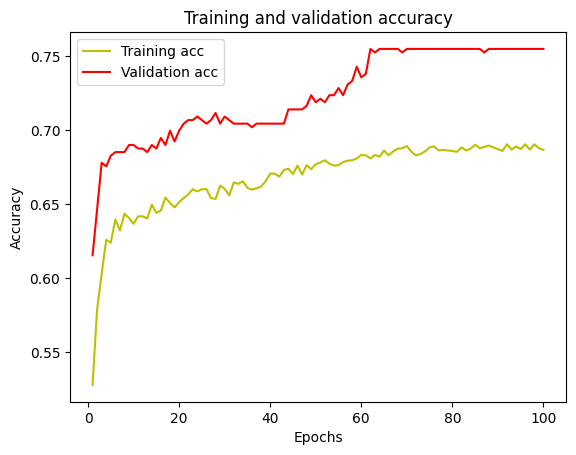

13/13 [==============================] - 0s 2ms/step - loss: 0.5328 - accuracy: 0.7548
Test Accuracy: 0.754807710647583


In [208]:
#model 생성
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1), kernel_regularizer=l2(0.001)))
model.add(Dropout(0.4)),  # Dropout 추가
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5)),  # Dropout 추가
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test),callbacks=[early_stopping])

# 손실 그래프 시각화
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도 그래프 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Test Accuracy: {accuracy}')